### Introduction

The following equation describes an oscillator - a mass attached to a spring. An additional level of realism is introducted by including *damping* or the fricitional forces that will eventually stop to oscillator from moving.

$\frac{d^2x}{dt^2} + 2 \gamma \omega_0\frac{dx}{dt} + \omega_0^2x = 0$,

where two system independent constants have been introduced.

$ \omega_0 = \sqrt{\frac{k}{m}}$, the *natural frequency*
$\gamma = \frac{b}{2m\omega_0}$, the *damping coefficient*.

This is a model of physical behavior which is very intuitave in the case of a mass and spring, but can apply nicely to electrical circuits, geophysical situations, and the mechanics of materials.

Let us begin our study by solving the equations in a naive way, using what we already know about deriviates. The first issue is that the equation is second order, but it will be easier to solve it with a pair of first order equations.

$\frac{dx}{dt} = v$

$\frac{dv}{dt} = -2 \gamma \omega_0\frac{dx}{dt} - \omega_0^2x$

While this seems strange at first, consider the derivatives that arise from forward differencing in the time domain:

$\frac{x(t+\Delta t) - x(t)}{\Delta t} = v$

$\frac{v(t+\Delta t) - v(t)}{\Delta t} = -2 \gamma \omega_0\frac{dx}{dt} - \omega_0^2x$

which can be solved algebraically, yielding a recurrence relations:

$x(t+\Delta t) = v(t) \Delta t + x(t)$

$v(t+\Delta t) = (-2 \gamma \omega_0 v(t) - \omega_0^2x(t))\Delta t + v(t)$

Now, I'd like you to solve this in a way that may seem counter intuitive at first, but will make more sense later. 

1. Develop a function that accepts a 1 x 2 numpy array containing the position and the velocity of the oscillator. It should return an equal sized numpy array containing the first time derivative of each of the inputs. Although your function will not use it, include time as the second arguement.
2. Write a second function, called Euler, which accepts the function written above, the current position and velocity in a numpy array, the time, and the desired time step. It should return a 1 x 2 numpy array containing the position and time at $t+\Delta t$ according to the formulas that were found above from finite differencing.
3. Write a loop that starts at time zero and runs forward to time 50. Make it take time steps of 0.1. Assign $\omega_0$ = 1 and $\gamma$ = 0. Plot the time series of positions. What should the output look like in this case? What does the output look like? 
4. Reduce the time step until the output looks the way you expect it to.
5. The energy of a harmonic oscillator (no damping) is $\frac{1}{2}mv^2-\frac{1}{2}kx^2$. Determine the energy of the oscillator and plot that as a function of time. Find the time step that causes the oscillator to lose or gain less than 1% in 50 time steps (seconds). Assume $m$=1.


In [ ]:
import numpy as np
import pylab as plt

from __future__ import division

omega_0 = 1
gamma = 0
dt = .1
T = 50

def dho(x0,t):
    """
    INPUT:
       x0 = a 1 x 2 array containing the position and velocity
       t  = the time the results are to be evaluated at (not always used)
    OUTPUT:
       dx0dt = a 1 x 2 array containing the derivatives of position and velocity
    """
    dx0dt = np.array(2)
    dx0dt[0] = (x0[1] * dt) + x0[0]
    dx0dt[1] = -((2 * omega_0 * dx0dt[0]) - ((omega_0**2) * x0[0])) * dt + x0[0]

    return dx0dt

def euler(f,x,t,dt):
    """
    INPUTS:
       f = a function to 'integrate', or take foward in time, the function takes 
           a 'state' and returns the first derivative of the state.
       x = the state at the begining of the time step, for example:
           x = [position,velocity]
       t = the time when the function is evaluated
       dt = the size of the time step to be used
    OUTPUT
       x(t+dt) = the initial state at some new time, t + dt
    """
    return f(x,t) * dt + x

print(euler(dho,0,0,0.1))

### Improvement on time integration
You may have noticed that the approach used in the previous exercises did not work that well. The oscillator (unphysically) loses energy irrespective of the time step. Let's try and improve the way the integration is perfomed. Consult the wikipedia page on the Runge Kutta method and implement the RK4 method. It should be straight forward because you've already coded things in a manner that allows the change to be made. 

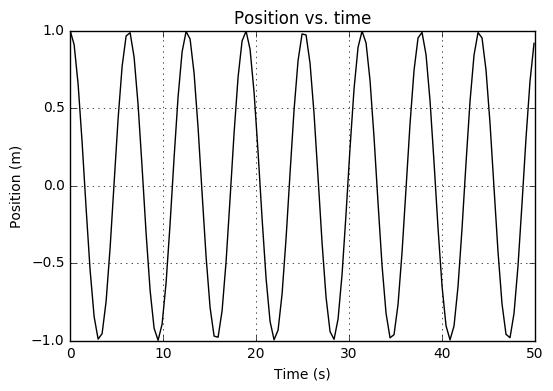

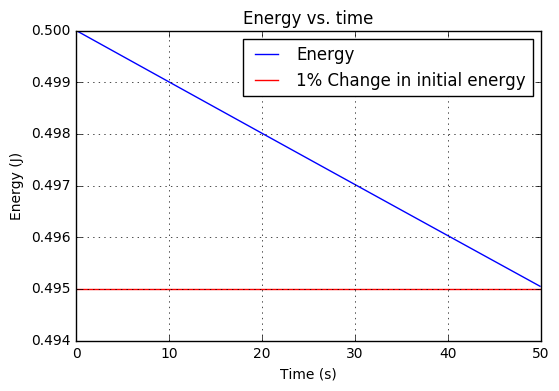

In [2]:
def rk4(f,x,t,dt):
"""
This has the same signature as Euler, but is now a higher order scheme.
"""

### Critical damping

Now that you've got a time integration scheme that works well, it's time to do some physics. Use what you've learned to determine the optimal $\gamma$ for bringing the damped harmonic oscillator to rest. There is an analytical solution to this problem, but here I'd like you to find the answer via *simulation* by using a range of $\gamma$ values from .5 to 2 and find the one that has the shortest time until the mass stops moving. Does the physical reasoning behind this make sense to you?
